In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from IPython import display
from IPython.display import clear_output

import os
import glob
import imageio
import time
import IPython.display as ipd

import librosa
import librosa.display
import warnings

from matplotlib import image
from PIL import Image
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/gtzan-dataset-music-genre-classification.zip /content/sample_data

In [ ]:
!unzip /content/sample_data/gtzan-dataset-music-genre-classification.zip

In [ ]:
# removed because its corrupted
!rm /content/Data/genres_original/jazz/jazz.00054.wav

In [7]:
# get list of genres
general_path = '/content/Data'
genres = list(os.listdir(f'{general_path}/genres_original/'))

In [8]:
# retrieve all the filenames
filenames = []
for gen in genres:
    for fname in list(os.listdir(f'{general_path}/genres_original/'+gen)):
        filenames.append(gen+'/'+fname)
len(filenames)

999

In [ ]:
genres

['disco',
 'country',
 'reggae',
 'blues',
 'hiphop',
 'metal',
 'jazz',
 'classical',
 'pop',
 'rock']

Making directories to store our spectograms required for training CNN

In [9]:
!mkdir '/content/Data/spectogram'
!mkdir '/content/Data/spectogram/disco'
!mkdir '/content/Data/spectogram/country'
!mkdir '/content/Data/spectogram/reggae'
!mkdir '/content/Data/spectogram/blues'
!mkdir '/content/Data/spectogram/hiphop'
!mkdir '/content/Data/spectogram/metal'
!mkdir '/content/Data/spectogram/jazz'
!mkdir '/content/Data/spectogram/classical'
!mkdir '/content/Data/spectogram/pop'
!mkdir '/content/Data/spectogram/rock'

In [ ]:
# generating spectorgrams and saving them as images
for fname in filenames:
  y, sr = librosa.load(f'{general_path}/genres_original/'+fname)
  y,_ = librosa.effects.trim(y) 
  S = librosa.feature.melspectrogram(y, sr=sr)
  S_DB = librosa.amplitude_to_db(S, ref=np.max)
  plt.figure(figsize = (16, 6))
  librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log', cmap = 'cool')
  plt.axis('off')
  plt.savefig('/content/Data/spectogram/'+fname[:-4]+'.png')

# Exploratory Data Analysis

In [78]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.wav  661794          0.350088  ...     1.221291   46.936035  blues
1  blues.00001.wav  661794          0.340914  ...     0.531217   45.786282  blues
2  blues.00002.wav  661794          0.363637  ...    -2.231258   30.573025  blues
3  blues.00003.wav  661794          0.404785  ...    -3.407448   31.949339  blues
4  blues.00004.wav  661794          0.308526  ...   -11.703234   55.195160  blues

[5 rows x 60 columns]

In [62]:
y, sr = librosa.load(f'{general_path}/genres_original/pop/pop.00020.wav')

print(y.shape)
print(sr)

print("Len of Audio -> ", y.shape[0]/sr)

(661504,)
22050
Len of Audio ->  30.00018140589569


In [63]:
# trimming the zeros at the start and end of the audio file
audio_file, _ = librosa.effects.trim(y)

Text(0.5, 1.0, 'Sound Waves in Pop 20')

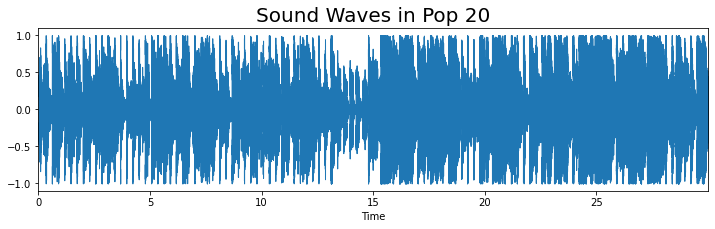

In [64]:
plt.figure(figsize = (12, 3))
librosa.display.waveplot(audio_file)
plt.title("Sound Waves in Pop 20", fontsize = 20)

Shape of D object: (1025, 1293)


 ...]

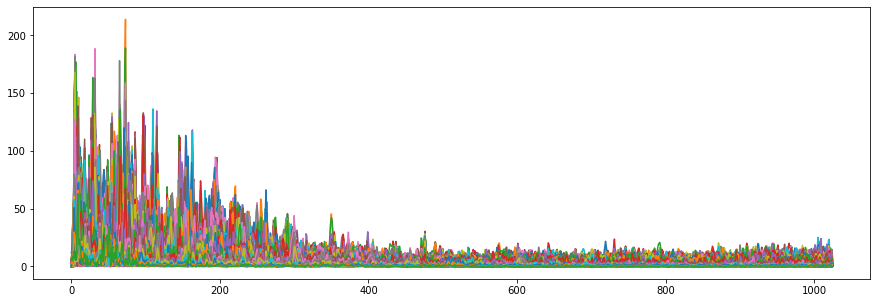

In [65]:
#  STFT represents a signal in the time-frequency domain 
#  by computing discrete Fourier transforms (DFT) over short overlapping windows.
D = np.abs(librosa.stft(audio_file))
print('Shape of D object:', np.shape(D))

plt.figure(figsize = (15, 5))
plt.plot(D)

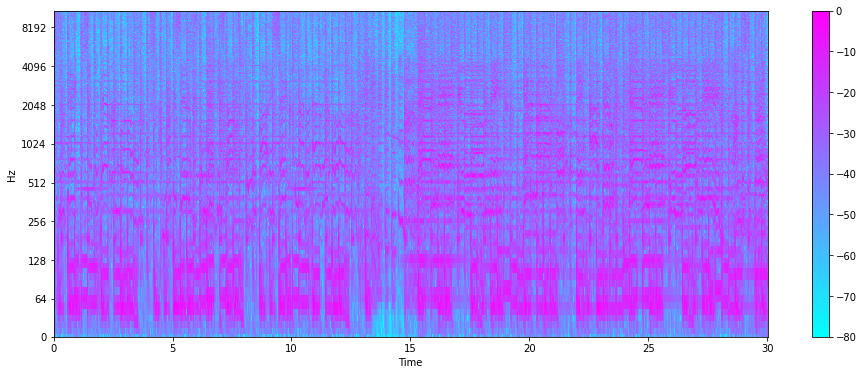

In [66]:
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()

Text(0.5, 1.0, 'Metal Mel Spectrogram')

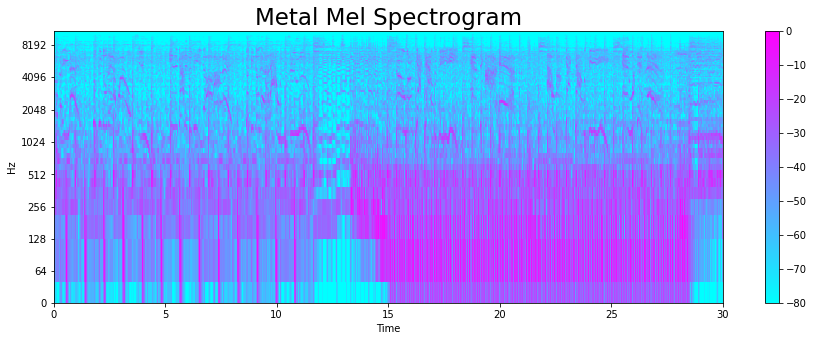

In [67]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

# Generating the mel-spectogram
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (15, 5))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23)

HPSS does Median-filtering harmonic percussive source separation.

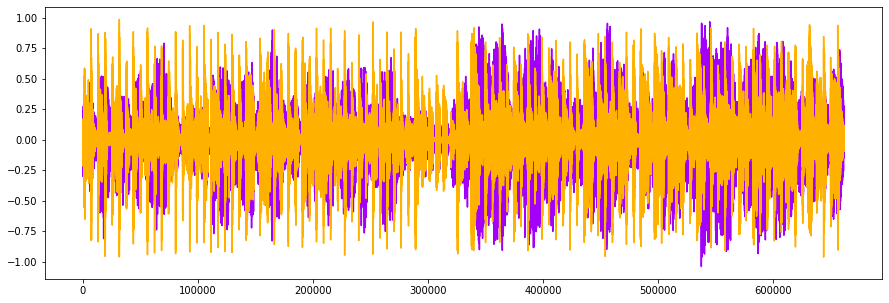

In [68]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (15, 5))
plt.plot(y_harm, color = '#A300F9')
plt.plot(y_perc, color = '#FFB100')

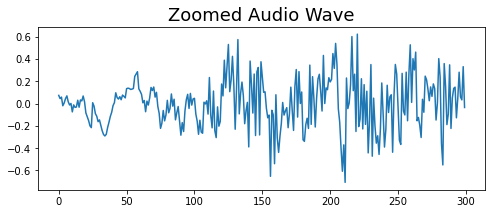

In [69]:
#Zoomed Audio Wave
start = 900
end = 1200
plt.figure(figsize=(8,3))
plt.plot(audio_file[start:end])
plt.title('Zoomed Audio Wave', fontsize = 18)
plt.show()

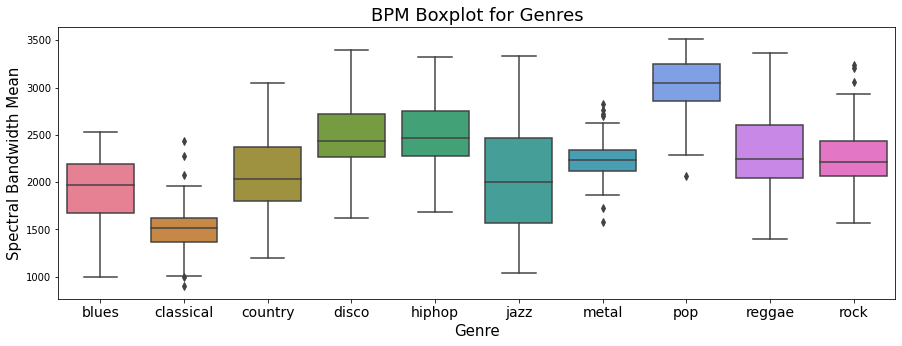

In [70]:
x = data[["label", "spectral_bandwidth_mean"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Spectral Bandwidth Mean", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

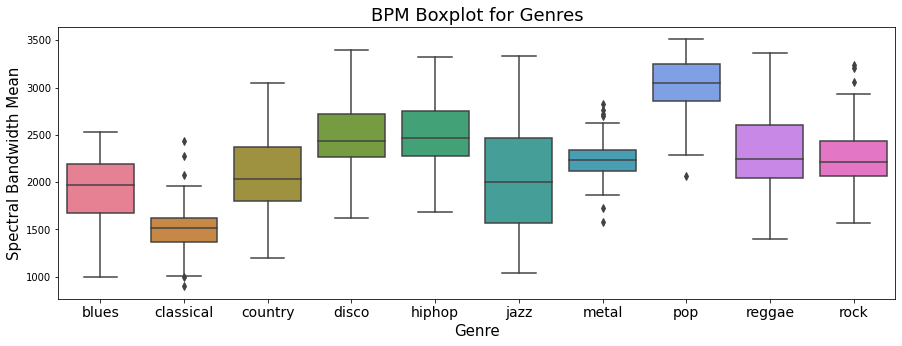

In [71]:
x = data[["label", "spectral_bandwidth_mean"]]

fig, ax = plt.subplots(figsize=(15, 5));
sns.boxplot(x = "label", y = "spectral_bandwidth_mean", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Spectral Bandwidth Mean", fontsize = 15)
plt.savefig("BPM_Boxplot.png")


Plotting coorelatin matrx

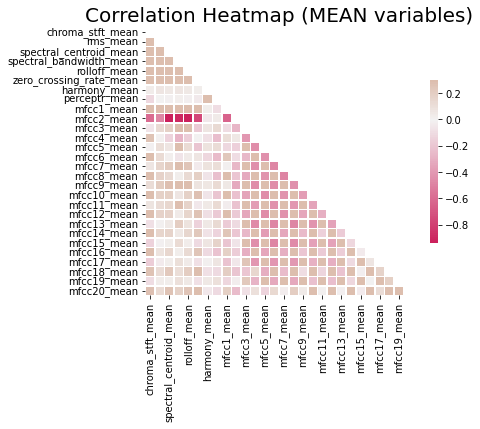

In [72]:
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

Centroids: [2957.18146335 3756.91277217 5038.17782004 ... 3271.30628791 2526.35610848
 2114.95923998] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


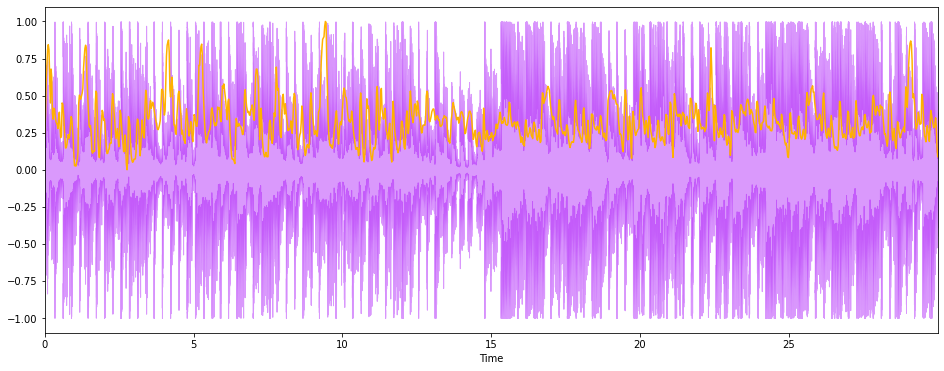

In [73]:
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

Chromogram shape: (12, 14)


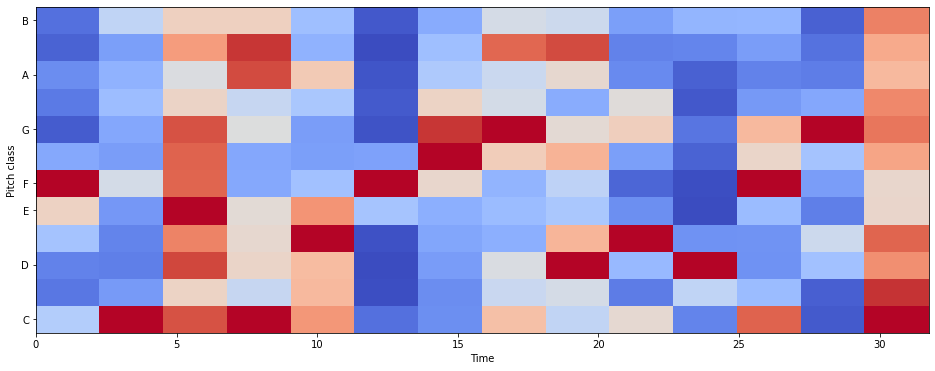

In [74]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 50000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## Principal Componenet Analysis


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize = (10, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Feature Engineering

## Generating Image data

In [ ]:
# generating spectorgrams and saving them as images
for fname in filenames:
  y, sr = librosa.load(f'{general_path}/genres_original/'+fname)
  y,_ = librosa.effects.trim(y) 
  S = librosa.feature.melspectrogram(y, sr=sr)
  S_DB = librosa.amplitude_to_db(S, ref=np.max)
  plt.figure(figsize = (16, 6))
  librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log', cmap = 'cool')
  plt.axis('off')
  plt.savefig('/content/Data/spectogram/'+fname[:-4]+'.png')

## Feature Extraction from audio

In [ ]:
# creating new dataframe to save features of each of the audio
features_audio = pd.DataFrame(columns=[
                                       'filename', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 
                                       'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean',
                                       'spectral_bandwidth_var', 'spectral_flatness_mean', 'spectral_flatness_var',
                                       'spectral_rolloff_mean', 'spectral_rolloff_var', 'spectral_zero_crossing_rate_mean',
                                       'spectral_zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'percussive_mean',
                                       'percussive_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
                                       'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
                                       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
                                       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var',
                                       'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
                                       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 
                                       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'])
for fname in filenames:
    # loading audi file
    af, sr = librosa.load(f'{general_path}/genres_original/'+fname)

    # triming leading and trailing zeros
    audio_file,_ = librosa.effects.trim(af) 

    # extracting all the features of the audio
    S = librosa.feature.melspectrogram(audio_file, sr=sr)
    chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=5000)
    chroma_stft_mean = np.mean(chromagram)
    chroma_stft_var = np.var(chromagram)
    rms_mean = np.mean(librosa.feature.rms(S))
    rms_var = np.var(librosa.feature.rms(S))
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(audio_file, sr=sr))
    spectral_centroid_var = np.var(librosa.feature.spectral_centroid(audio_file, sr=sr))
    spectral_bandwidth_mean = np.mean(librosa.feature.spectral_bandwidth(audio_file, sr=sr))
    spectral_bandwidth_var = np.var(librosa.feature.spectral_bandwidth(audio_file, sr=sr))
    spectral_flatness_mean = np.mean(librosa.feature.spectral_flatness(audio_file))
    spectral_flatness_var = np.var(librosa.feature.spectral_flatness(audio_file))
    spectral_rolloff_mean = np.mean(librosa.feature.spectral_rolloff(audio_file, sr=sr))
    spectral_rolloff_var = np.var(librosa.feature.spectral_rolloff(audio_file, sr=sr))
    spectral_zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(audio_file))
    spectral_zero_crossing_rate_var = np.var(librosa.feature.zero_crossing_rate(audio_file))
    y_harm, y_perc = librosa.effects.hpss(audio_file, margin=(1.0,5.0))
    harmony_mean = np.mean(y_harm)
    harmony_var = np.var(y_harm)
    percussive_mean = np.mean(y_perc)
    percussive_var = np.var(y_perc)
    tempo,_ = librosa.beat.beat_track(audio_file, sr=sr) 
    mfccs_mean =  np.mean(librosa.feature.mfcc(audio_file, sr=sr), axis=1)
    mfccs_var = np.var(librosa.feature.mfcc(audio_file, sr=sr), axis=1)

    # saving the features in the dataframe
    row = {'filename':fname, 'chroma_stft_mean':chroma_stft_mean, 'chroma_stft_var':chroma_stft_var, 'rms_mean':rms_mean, 
           'rms_var':rms_var, 'spectral_centroid_mean':spectral_centroid_mean, 'spectral_centroid_var':spectral_centroid_var, 
           'spectral_bandwidth_mean':spectral_bandwidth_mean, 'spectral_bandwidth_var':spectral_bandwidth_var, 
           'spectral_flatness_mean':spectral_flatness_mean, 'spectral_flatness_var':spectral_flatness_var,
           'spectral_rolloff_mean':spectral_rolloff_mean, 'spectral_rolloff_var':spectral_rolloff_var,
           'spectral_zero_crossing_rate_mean': spectral_zero_crossing_rate_mean, 
           'spectral_zero_crossing_rate_var':spectral_zero_crossing_rate_var, 'harmony_mean':harmony_mean, 
           'harmony_var':harmony_var, 'percussive_mean':percussive_mean, 'percussive_var':percussive_var, 'tempo':tempo, 
           'mfcc1_mean':mfccs_mean[0], 'mfcc1_var':mfccs_var[0], 'mfcc2_mean':mfccs_mean[1], 'mfcc2_var':mfccs_var[1],
           'mfcc3_mean':mfccs_mean[2], 'mfcc3_var':mfccs_var[2], 'mfcc4_mean':mfccs_mean[3], 'mfcc4_var':mfccs_var[3], 
           'mfcc5_mean':mfccs_mean[4], 'mfcc5_var':mfccs_var[4], 'mfcc6_mean':mfccs_mean[5], 'mfcc6_var':mfccs_var[5], 
           'mfcc7_mean':mfccs_mean[6], 'mfcc7_var':mfccs_var[6], 'mfcc8_mean':mfccs_mean[7], 'mfcc8_var':mfccs_var[7],
           'mfcc9_mean':mfccs_mean[9], 'mfcc9_var':mfccs_var[8], 'mfcc10_mean':mfccs_mean[9], 'mfcc10_var':mfccs_var[9], 
           'mfcc11_mean':mfccs_mean[10], 'mfcc11_var':mfccs_var[10], 'mfcc12_mean':mfccs_mean[11], 'mfcc12_var':mfccs_var[11], 
           'mfcc13_mean':mfccs_mean[12], 'mfcc13_var':mfccs_var[12], 'mfcc14_mean':mfccs_mean[13], 'mfcc14_var':mfccs_var[13],
           'mfcc15_mean':mfccs_mean[14], 'mfcc15_var':mfccs_var[14], 'mfcc16_mean':mfccs_mean[15], 'mfcc16_var':mfccs_var[15], 
           'mfcc17_mean':mfccs_mean[16], 'mfcc17_var':mfccs_var[16], 'mfcc18_mean':mfccs_mean[17], 'mfcc18_var':mfccs_var[17], 
           'mfcc19_mean':mfccs_mean[18], 'mfcc19_var':mfccs_var[18], 'mfcc20_mean':mfccs_mean[19], 'mfcc20_var':mfccs_var[19]}
    features_audio = features_audio.append(row, ignore_index=True)
    print(fname)

In [ ]:
features_audio['label'] = data['label'] # adding labels to the data

In [ ]:
features_audio.to_csv('generated_features.csv') # exporting features to csv to make it reusable

# Modelling

In [11]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  ...  mfcc20_mean  mfcc20_var  label
0   66149          0.335406         0.091048  ...    -0.243027   43.771767  blues
1   66149          0.343065         0.086147  ...     5.784063   59.943081  blues
2   66149          0.346815         0.092243  ...     2.517375   33.105122  blues
3   66149          0.363639         0.086856  ...     3.630866   32.023678  blues
4   66149          0.335579         0.088129  ...     0.536961   29.146694  blues

[5 rows x 59 columns]

In [19]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

## Preprocessing and data preparation

In [20]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [21]:
# creating train test validation split as 70,15,15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [22]:
def model_assess(model, title = "Default"):
    '''
    to fit and evaluate our models

    :input:
     model : model to be evaluated
     title : title of the plots
    '''
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print("F1 Score: ",f1_score(y_test,preds, average='macro'))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

## XGBoost

F1 Score:  0.7402585684004725
Accuracy Cross Gradient Booster : 0.74566 



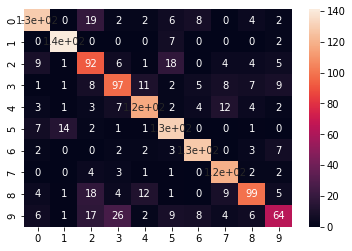

In [23]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.005)
model_assess(xgb, "Cross Gradient Booster")

## Stochastic Gradient Descent

F1 Score:  0.6363855743490251
Accuracy Stochastic Gradient Descent : 0.66088 



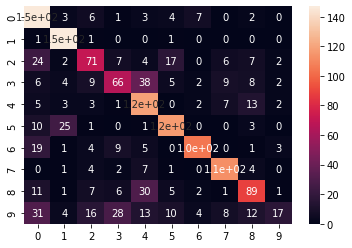

In [24]:
sgd = SGDClassifier(max_iter=50000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

## MLP Classifier

F1 Score:  0.8573207874953445
Accuracy Neural Nets : 0.85848 



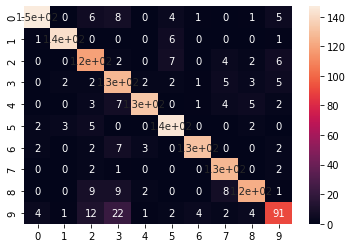

In [25]:
nn = MLPClassifier(solver='adam', alpha=1e-5, activation='relu', hidden_layer_sizes=(1000, 100), random_state=1)
model_assess(nn, "Neural Nets")

## Support Vector Machine

F1 Score:  0.7581005450841262
Accuracy Support Vector Machine : 0.76235 



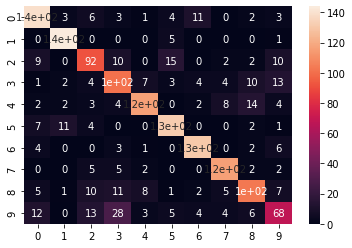

In [26]:
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

## Random Forest

F1 Score:  0.8110371833042812
Accuracy Random Forest : 0.81442 



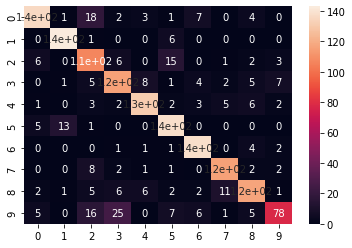

In [27]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

## Light Gradient Boosting Machine

In [28]:
clf = LGBMClassifier(num_leaves=30, max_depth=10, learning_rate=0.01, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.1, silent=-1, verbose =-1, random_state=42)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose = 100, early_stopping_rounds= 500)

Training until validation scores don't improve for 500 rounds.
[100]	training's multi_logloss: 1.10954	valid_1's multi_logloss: 1.2967
[200]	training's multi_logloss: 0.673907	valid_1's multi_logloss: 0.937943
[300]	training's multi_logloss: 0.440824	valid_1's multi_logloss: 0.738539
[400]	training's multi_logloss: 0.298571	valid_1's multi_logloss: 0.61553
[500]	training's multi_logloss: 0.207202	valid_1's multi_logloss: 0.535309
[600]	training's multi_logloss: 0.146695	valid_1's multi_logloss: 0.479199
[700]	training's multi_logloss: 0.105845	valid_1's multi_logloss: 0.437676
[800]	training's multi_logloss: 0.0769685	valid_1's multi_logloss: 0.405707
[900]	training's multi_logloss: 0.0570601	valid_1's multi_logloss: 0.382052
[1000]	training's multi_logloss: 0.0428971	valid_1's multi_logloss: 0.362471
[1100]	training's multi_logloss: 0.032682	valid_1's multi_logloss: 0.347268
[1200]	training's multi_logloss: 0.0253383	valid_1's multi_logloss: 0.334188
[1300]	training's multi_logloss: 0

LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=10000,
               num_leaves=30, random_state=42, reg_alpha=0.1, reg_lambda=0.1,
               silent=-1, verbose=-1)

In [29]:
fold_importance_df = pd.DataFrame()
feature_importance_df = pd.DataFrame()
fold_importance_df['feature'] = X_train.columns
fold_importance_df['importance'] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df,fold_importance_df], axis=0)

Text(0.5, 1.0, 'LGBM Features (avg over folds)')

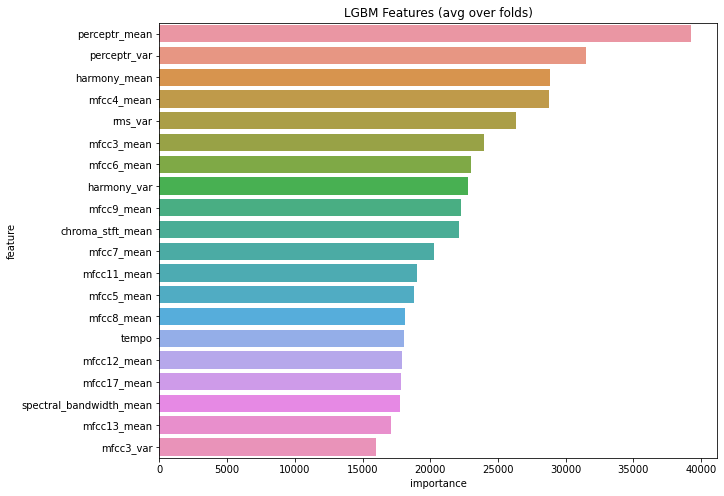

In [30]:
## plotting feature importance matrix
cols = feature_importance_df[['feature','importance']].groupby('feature').mean().sort_values(by = "importance", ascending=False)[:20].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(10,8))
sns.barplot(x='importance',y = 'feature', data=best_features.sort_values(by="importance", ascending=False))
plt.title("LGBM Features (avg over folds)")

In [31]:
y_pred_lgbm = clf.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred_lgbm))

0.9038718291054739


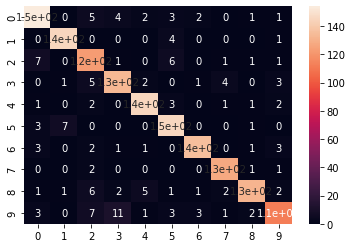

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True)

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_lgbm, average='macro')

0.9035325083701913

## Deep Neural Network using Keras

In [38]:
# encoding target variables as they are categories
label_as_binary = LabelBinarizer()
y = label_as_binary.fit_transform(y)

In [39]:
# creating train test validation split as 70,15,15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [40]:
import tensorflow as tf
print("TF version:-", tf.__version__)
import keras as k
# tf.random.set_seed(seed)

TF version:- 2.7.0


In [41]:
def trainModel(model, epochs, optimizer):
    '''
    compiles and fits the model on the train data

    :params:
     model : built model
     epochs : number of epochs
     optimizer : optimizer to be used

    :returns:
     model fit on the given dataset
    '''
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

def plotHistory(history):
    '''
    plots errors
    '''
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [42]:
model_4 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.3),
    
    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),

    k.layers.Dense(10, activation='softmax'),
])
print(model_4.summary())
model_4_history = trainModel(model=model_4, epochs=500, optimizer='rmsprop')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              60416     
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

Max. Validation Accuracy 0.9332888722419739


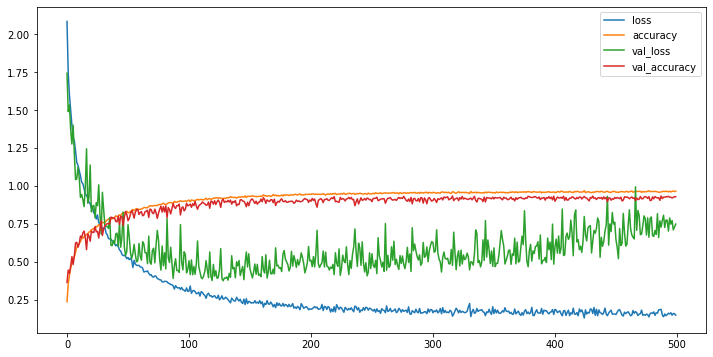

In [43]:
plotHistory(model_4_history)

## Convolutional Neural Network

In [ ]:
!rm -r '/content/Data/spectogram/.ipynb_checkpoints/'

### Generating dataset
Creates train and validation sets from the data available in folder path provided. Each subfolder is regarded as 1 category or class

In [ ]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Data/spectogram/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Data/spectogram/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [ ]:
# Augmenting the data to create more variations and help build a more robust model
data_augmentation = keras.Sequential(
    [
        # randomly flips horizontally
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

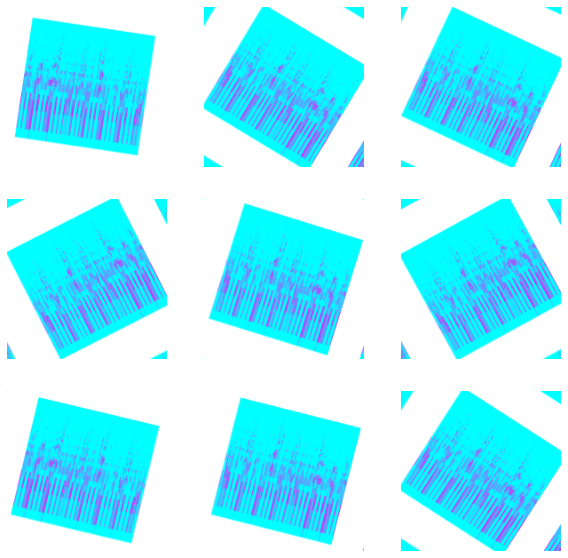

In [ ]:
# Example of augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# buffered prefetching so data can be yielded from disk without having I/O becoming blocking:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

### Building a small Xception Network

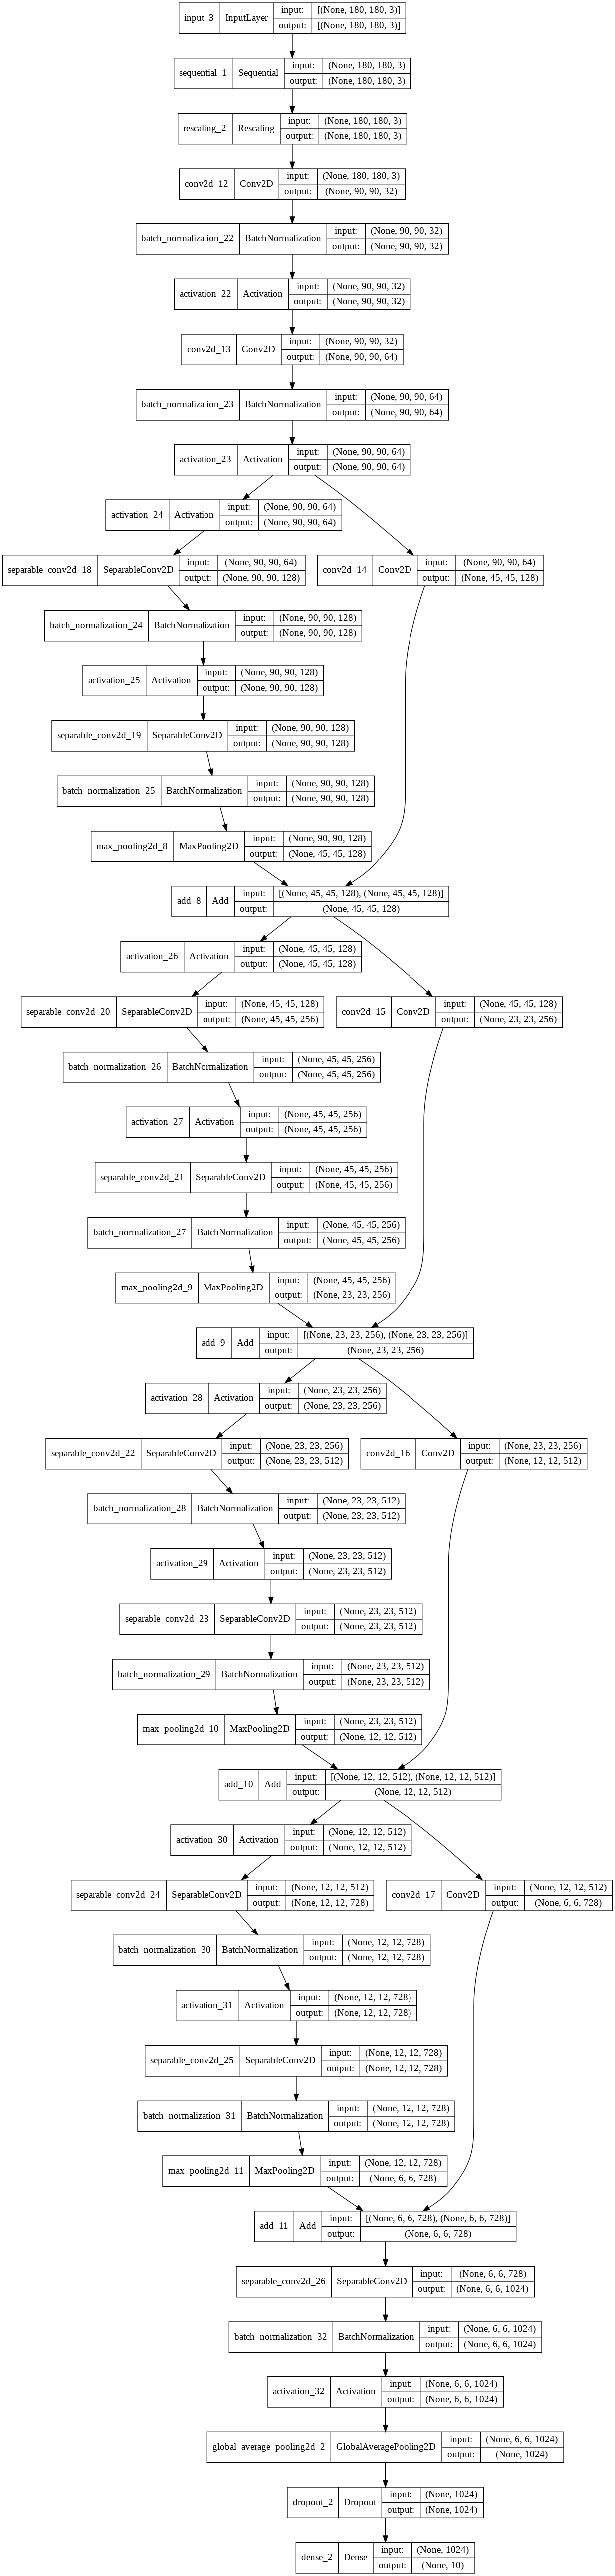

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    # Rescaling to standaridize the data. As RGB channels have values [0,255] which are difficult ot work with
    # so normalized to [0,1]
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        # for binary classification task
        activation = "sigmoid"
        units = 1
    else:
        # for mulit-class classification
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

model = make_model(input_shape=image_size + (3,), num_classes=10)
keras.utils.plot_model(model, show_shapes=True)

### Training our CNN model
Sparse categorical entropy is used as labels as encoded into integer variables

In [ ]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
25/25 [==============================] - 209s 8s/step - loss: 2.0569 - accuracy: 0.2675 - val_loss: 2.3022 - val_accuracy: 0.1106
Epoch 2/50
25/25 [==============================] - 200s 8s/step - loss: 1.8249 - accuracy: 0.3500 - val_loss: 2.3190 - val_accuracy: 0.1106
Epoch 3/50
25/25 [==============================] - 200s 8s/step - loss: 1.7160 - accuracy: 0.3663 - val_loss: 2.3546 - val_accuracy: 0.1106
Epoch 4/50
25/25 [==============================] - 205s 8s/step - loss: 1.6404 - accuracy: 0.4200 - val_loss: 2.4579 - val_accuracy: 0.1106
Epoch 5/50
25/25 [==============================] - 201s 8s/step - loss: 1.6166 - accuracy: 0.4462 - val_loss: 2.6867 - val_accuracy: 0.1106
Epoch 6/50
25/25 [==============================] - 202s 8s/step - loss: 1.4910 - accuracy: 0.4688 - val_loss: 3.0166 - val_accuracy: 0.1106
Epoch 7/50
25/25 [==============================] - 200s 8s/step - loss: 1.4100 - accuracy: 0.5050 - val_loss: 3.0048 - val_accuracy: 0.1106
Epoch 8/50
25

# Recommendations

### Nearest Neighbors

In [44]:
from sklearn.neighbors import NearestNeighbors
import IPython.display as ipd

In [52]:
data = pd.read_csv(f'{general_path}/features_30_sec.csv')

In [53]:
data

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0    blues.00000.wav  661794          0.350088  ...     1.221291   46.936035  blues
1    blues.00001.wav  661794          0.340914  ...     0.531217   45.786282  blues
2    blues.00002.wav  661794          0.363637  ...    -2.231258   30.573025  blues
3    blues.00003.wav  661794          0.404785  ...    -3.407448   31.949339  blues
4    blues.00004.wav  661794          0.308526  ...   -11.703234   55.195160  blues
..               ...     ...               ...  ...          ...         ...    ...
995   rock.00095.wav  661794          0.352063  ...    -1.193787   49.950665   rock
996   rock.00096.wav  661794          0.398687  ...    -2.795338   31.773624   rock
997   rock.00097.wav  661794          0.432142  ...    -2.106337   29.865515   rock
998   rock.00098.wav  661794          0.362485  ...    -3.590644   41.299088   rock
999   rock.00099.wav  661794          0.358401  ...     1.155239   49.662510   rock

[1000 rows x 60 columns]

In [54]:
knn = NearestNeighbors(n_neighbors=10, radius=0.1, algorithm='brute')
knn.fit(data[data.columns[2:-1]],data['label'])

NearestNeighbors(algorithm='brute', n_neighbors=10, radius=0.1)

In [55]:
def get_playlist(filename, nn):
  '''
  generates playlist similar to the specified song

  :params:
   filename : name of the file to start generating playlist
   nn       : nearest neighbours

  :returns:
   idx : names of the songs from the original dataframe
  '''
  song = data[data['filename'] == filename]
  neighbour = nn.kneighbors(song[song.columns[2:-1]], return_distance=True)
  idx = []
  for item in neighbour[1][0]:
    idx.append(filenames[item])
  return idx

In [56]:
playlist = get_playlist('pop.00019.wav', knn)
print('Playlist:', playlist)
ipd.Audio(f'{general_path}/genres_original/'+playlist[2])

Playlist: ['jazz/jazz.00029.wav', 'pop/pop.00062.wav', 'jazz/jazz.00076.wav', 'metal/metal.00010.wav', 'rock/rock.00099.wav', 'jazz/jazz.00073.wav', 'pop/pop.00090.wav', 'pop/pop.00033.wav', 'country/country.00014.wav', 'pop/pop.00070.wav']


### Cosine Similarity

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
def get_recommendations(filename):
  song = data[data['filename'] == filename]
  z = zip(range(0,1000), cosine_similarity(data[data.columns[2:-1]], song[song.columns[2:-1]]))
  z = sorted(z, key = lambda x: -x[1])

  top = list(z)[:10]
  playlist = []
  for x,y in top:
    playlist.append(filenames[x])
  return playlist

In [58]:
recommendations = get_recommendations('pop.00019.wav')
print('Recommendations :', recommendations)

ipd.Audio(f'{general_path}/genres_original/'+recommendations[2])

Recommendations : ['jazz/jazz.00029.wav', 'metal/metal.00059.wav', 'jazz/jazz.00081.wav', 'metal/metal.00053.wav', 'jazz/jazz.00097.wav', 'jazz/jazz.00076.wav', 'blues/blues.00012.wav', 'jazz/jazz.00082.wav', 'metal/metal.00000.wav', 'classical/classical.00051.wav']
